# K-Means

In [1]:
%pip install graphviz pydotplus seaborn

Note: you may need to restart the kernel to use updated packages.


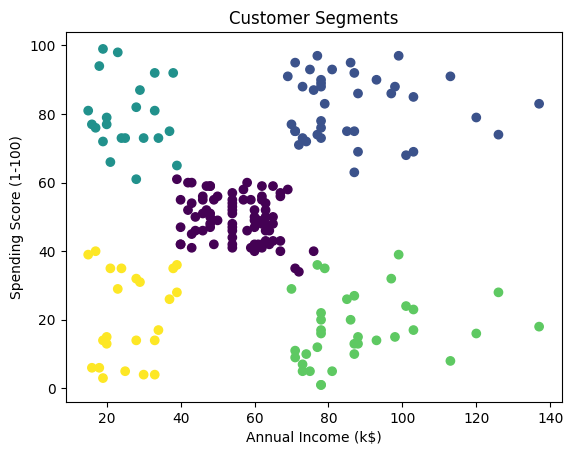

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/tirthajyoti/Machine-Learning-with-Python/master/Datasets/Mall_Customers.csv"
data = pd.read_csv(url)

# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# Fit the K-Means model
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments')
plt.show()

# PCA

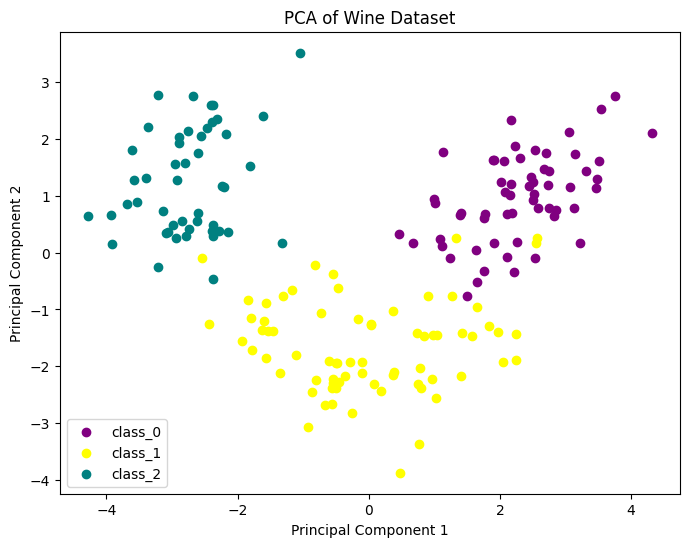

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the PCA results
plt.figure(figsize=(8, 6))
colors = ['purple', 'yellow', 'teal']
for i in range(len(colors)):
    px = X_pca[:, 0][y == i]
    py = X_pca[:, 1][y == i]
    plt.scatter(px, py, c=colors[i], label=wine.target_names[i])

plt.title('PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Ensemble learning

## Bagging

Validation Accuracy: 0.717948717948718
Test Accuracy: 0.7008547008547008


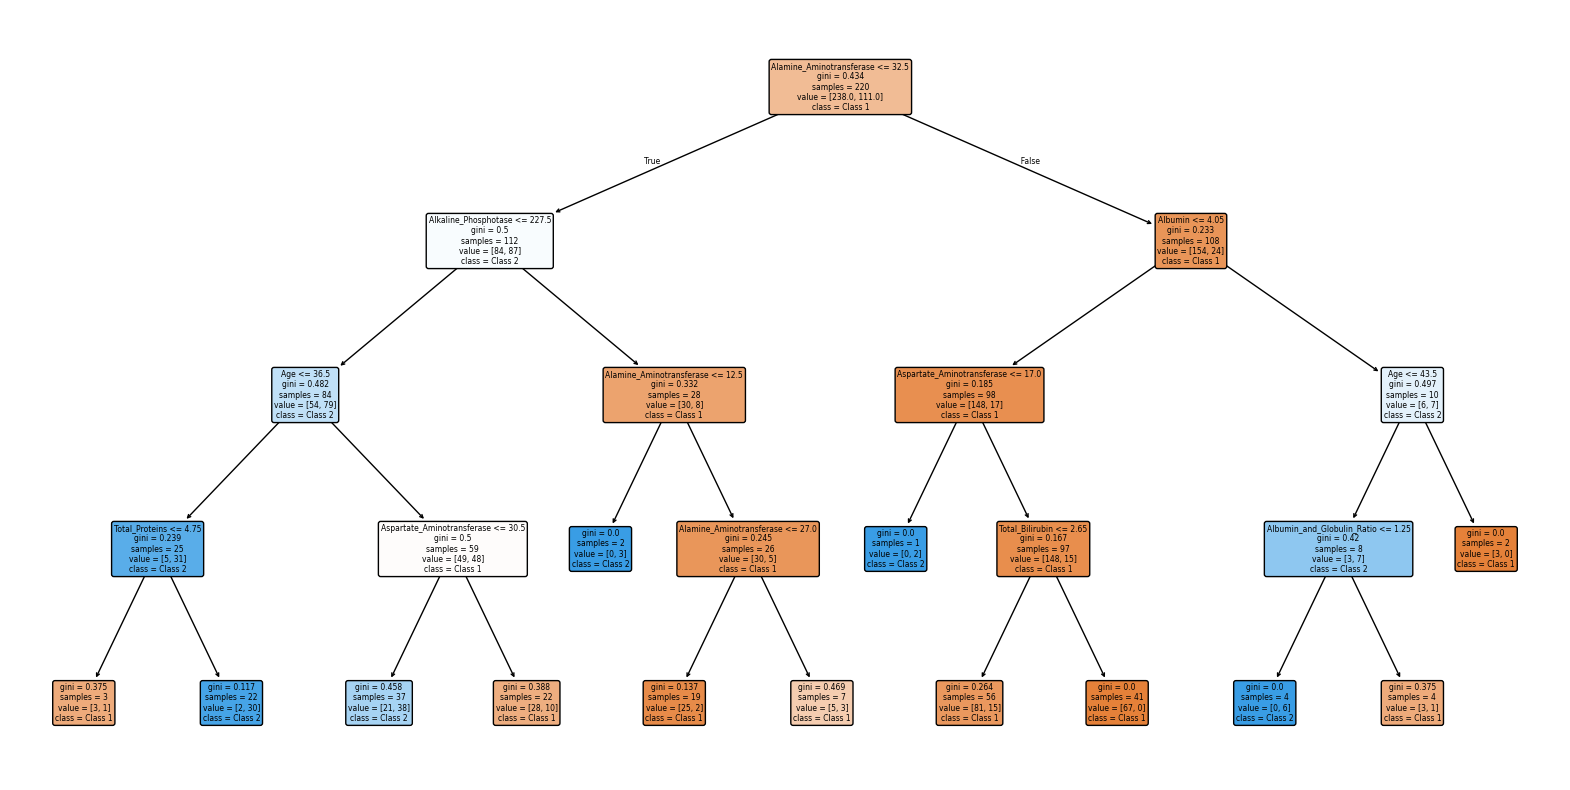

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
url = "https://raw.githubusercontent.com/mikeizbicki/datasets/master/csv/uci/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv"
data = pd.read_csv(url, header=None)

# Assign columns based on the dataset description
data.columns = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase", 
                "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Proteins", 
                "Albumin", "Albumin_and_Globulin_Ratio", "Selector"]

# Preprocess the data
# Convert gender to numerical
data['Gender'] = LabelEncoder().fit_transform(data['Gender'])

# Separate features and target
X = data.drop('Selector', axis=1)
y = data['Selector']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize the base estimator with some complexity
base_estimator = DecisionTreeClassifier(max_depth=4, random_state=42)

# Initialize the bagging classifier
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=42, n_jobs=-1)

# Train the bagging classifier on the training set
bagging_model.fit(X_train, y_train)

# Validate the model on the validation set
y_val_pred = bagging_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy}')

# After tuning, evaluate the final model on the test set
y_test_pred = bagging_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy}')

# Manually define the feature names and class names
feature_names = X.columns
class_names = ['Class 1', 'Class 2']  # Replace with actual class names if available

# Extract the first tree from the ensemble
estimator = bagging_model.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
plt.show()


# Boosting

In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the dataset
url = "https://www.openml.org/data/get_csv/31/dataset_31_adult.csv"
data = pd.read_csv(url)

# Assign columns based on the dataset description
data.columns = ["checking_status","duration","credit_history","purpose","credit_amount","savings_status", "employment", "installment_commitment",
                "personal_status","other_parties","residence_since","property_magnitude","age","other_payment_plans","housing","existing_credits",
                "job","num_dependents","own_telephone","foreign_worker","class"]
# # Separate features and target
X = data.drop("class", axis=1)
y = data['class']

# # Convert categorical columns to numerical
X = pd.get_dummies(X, drop_first=True)

# # Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Initialize the AdaBoost Classifier
ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)

# # Train the AdaBoost model
ada.fit(X_train, y_train)

# # Make predictions and evaluate the model
y_pred = ada.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


c:\mmlbook\.venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test Accuracy: 0.73


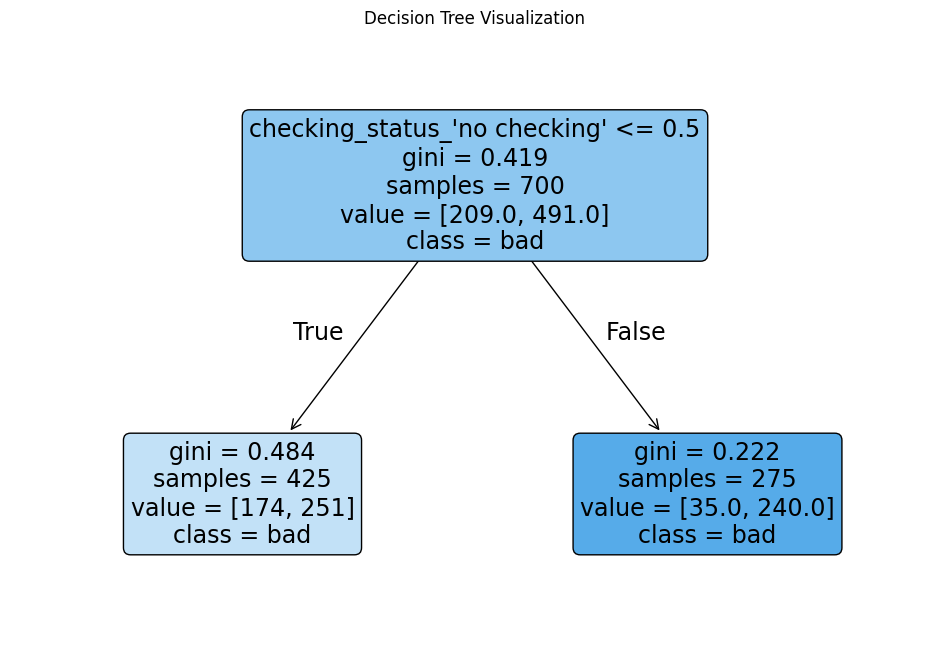

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Initialize and train a single decision tree
tree = DecisionTreeClassifier(max_depth=1)
tree.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=X.columns, class_names=y.unique(), filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()

# Feature importance

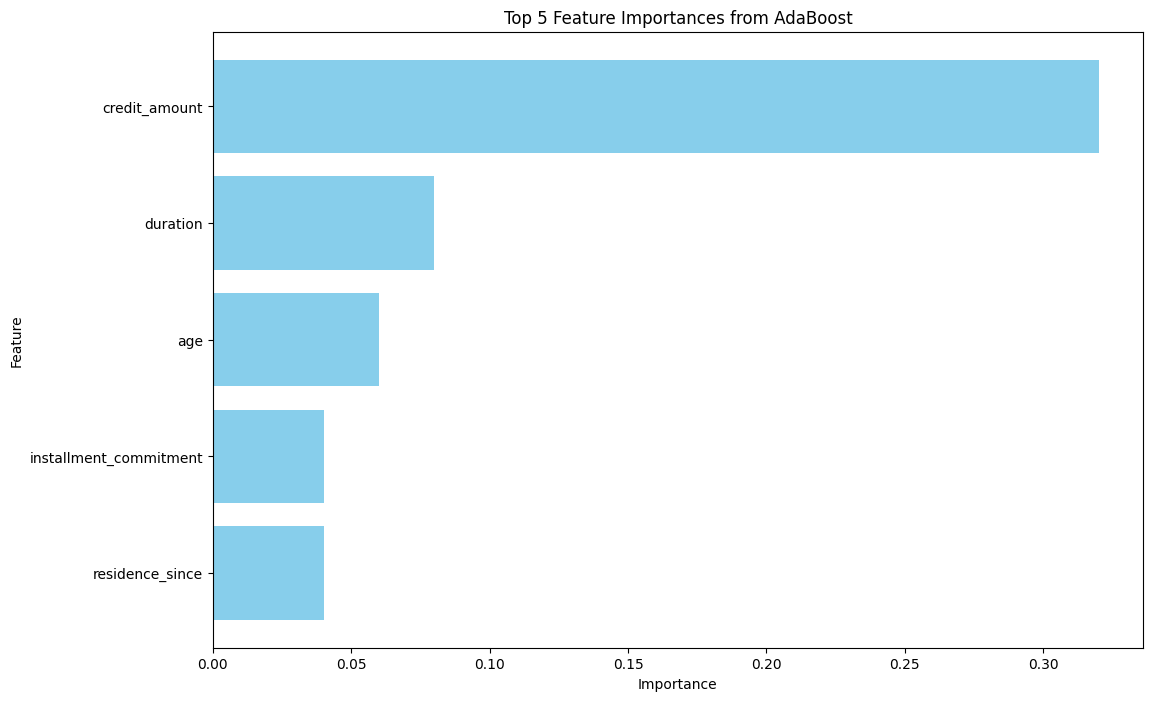

In [7]:
import numpy as np
import pandas as pd

# Get feature importances
feature_importances = np.mean([tree.feature_importances_ for tree in ada.estimators_], axis=0)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display the top 5 features
top_features = importance_df.head(5)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 5 Feature Importances from AdaBoost')
plt.gca().invert_yaxis()  # To display the highest importance at the top

# Stacking

Validation MSE: 0.27063119426915266
Validation R^2: 0.7922644386215157
Test MSE: 0.23686529696482603
Test R^2: 0.820870127646605


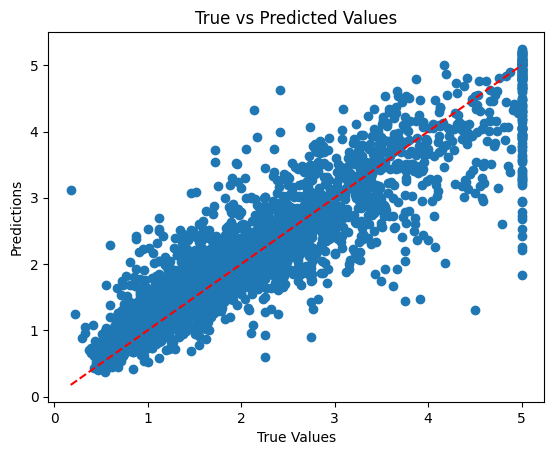

In [8]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the data into train and temporary sets (70% train, 30% temporary)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split the temporary set into validation and test sets (50% validation, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define the base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor()),
]

# Define the meta-model
meta_model = LinearRegression()

# Create the stacking regressor
stacking_model = StackingRegressor(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = stacking_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)
print(f'Validation MSE: {val_mse}')
print(f'Validation R^2: {val_r2}')

# Evaluate the model on the test set
y_test_pred = stacking_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f'Test MSE: {test_mse}')
print(f'Test R^2: {test_r2}')

# Plotting predicted vs true values
plt.scatter(y_test, y_test_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

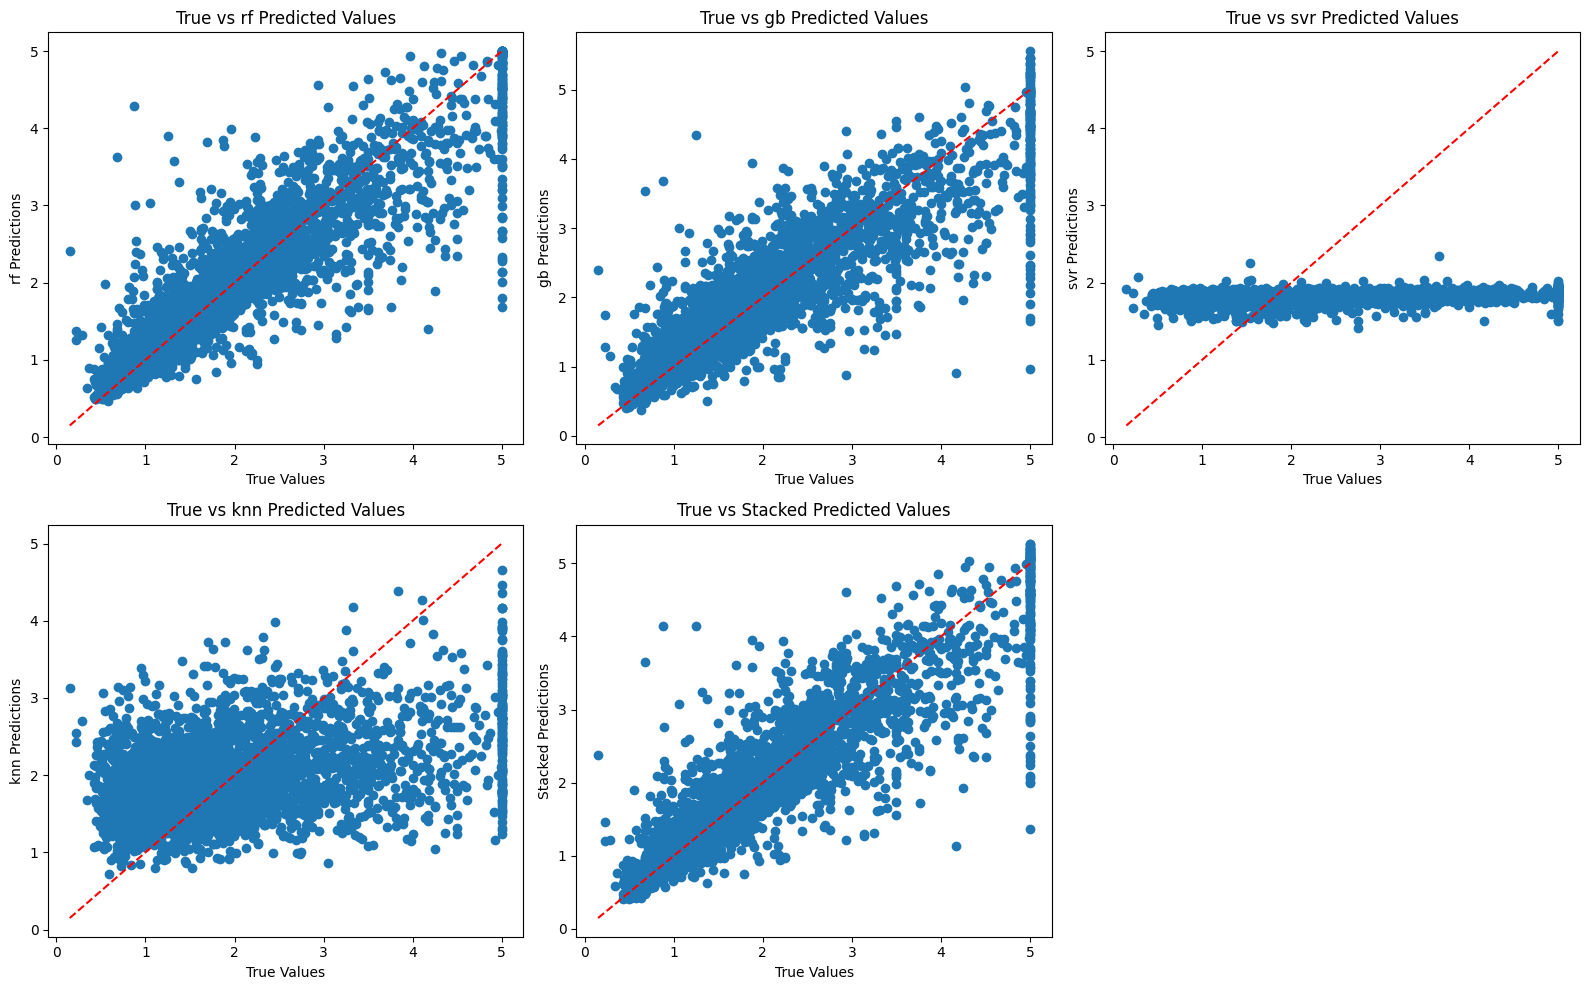

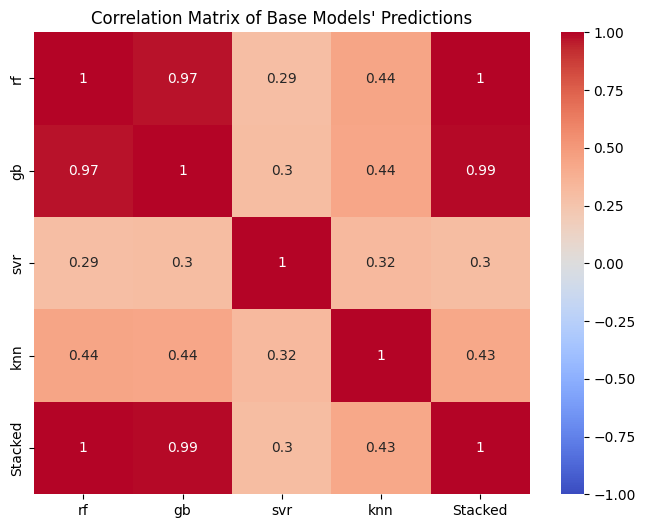

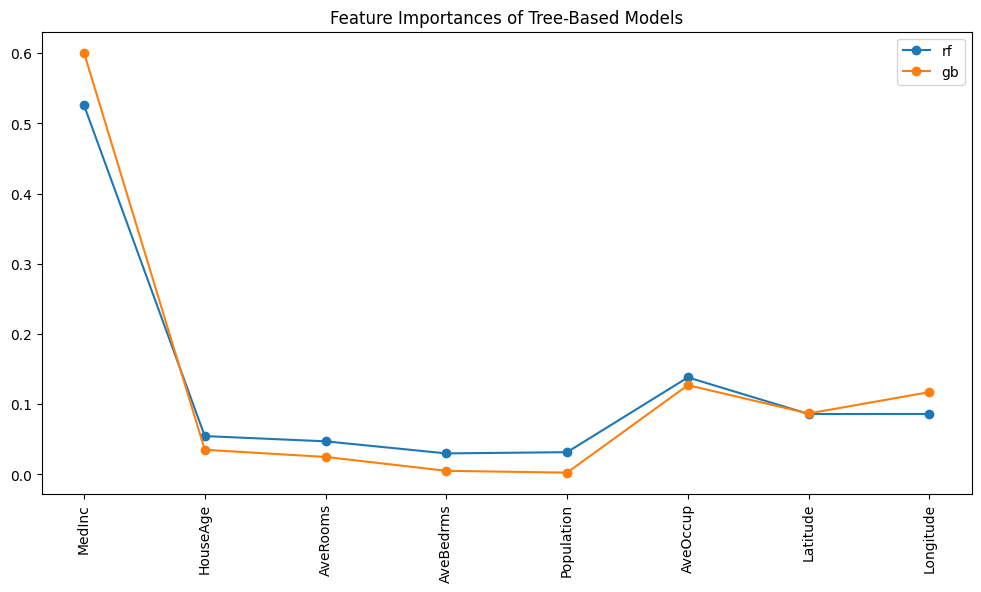

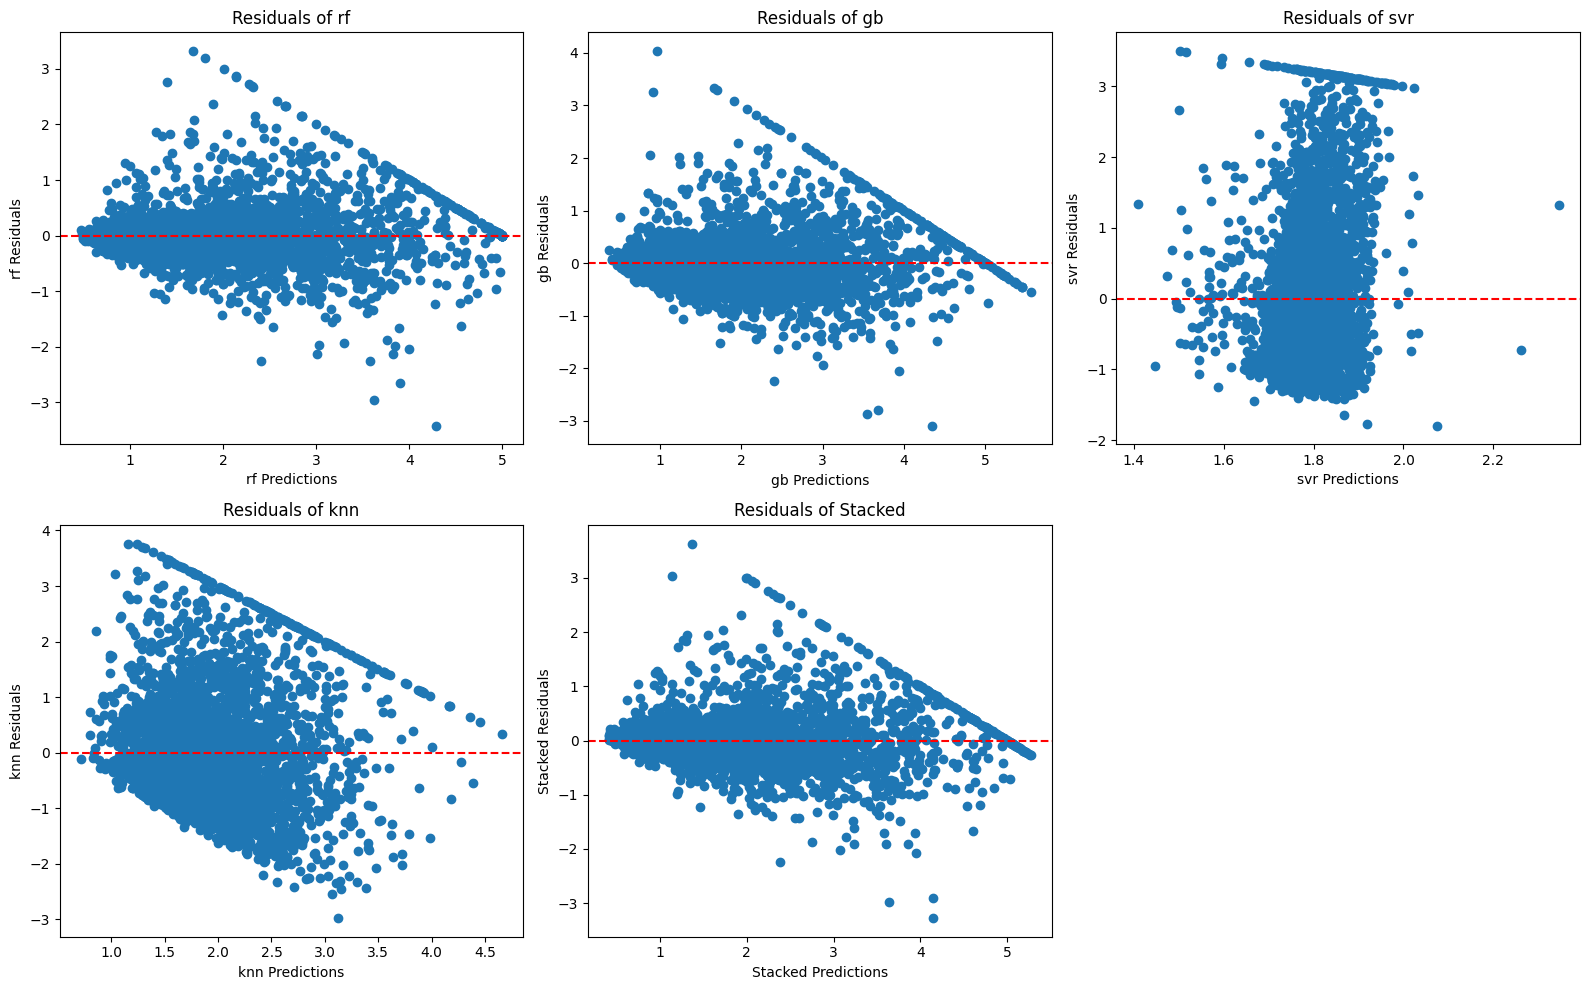

In [9]:
import seaborn as sns

# Get predictions from each base model
base_predictions = {}
for name, model in stacking_model.named_estimators_.items():
    base_predictions[name] = model.predict(X_val)

# Add the stacking model's predictions
base_predictions['Stacked'] = stacking_model.predict(X_val)

# Convert to DataFrame
pred_df = pd.DataFrame(base_predictions)

# Plot predictions from each base model vs true values
plt.figure(figsize=(16, 10))
for i, (name, preds) in enumerate(pred_df.items()):
    plt.subplot(2, 3, i + 1)
    plt.scatter(y_val, preds)
    plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--')
    plt.xlabel('True Values')
    plt.ylabel(f'{name} Predictions')
    plt.title(f'True vs {name} Predicted Values')
plt.tight_layout()
plt.show()

# Plot correlation matrix of the predictions
plt.figure(figsize=(8, 6))
sns.heatmap(pred_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Base Models\' Predictions')
plt.show()

# If your base models include tree-based models, plot feature importances
plt.figure(figsize=(12, 6))
for name, model in stacking_model.named_estimators_.items():
    if hasattr(model, 'feature_importances_'):
        plt.plot(X.columns, model.feature_importances_, marker='o', label=name)
plt.legend()
plt.title('Feature Importances of Tree-Based Models')
plt.xticks(rotation=90)
plt.show()

# Reset the index of y_val to ensure alignment with preds
y_val_reset = y_val.reset_index(drop=True)

# Residuals plot
plt.figure(figsize=(16, 10))
for i, (name, preds) in enumerate(pred_df.items()):
    plt.subplot(2, 3, i + 1)
    plt.scatter(preds, y_val_reset - preds)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(f'{name} Predictions')
    plt.ylabel(f'{name} Residuals')
    plt.title(f'Residuals of {name}')
plt.tight_layout()
plt.show()


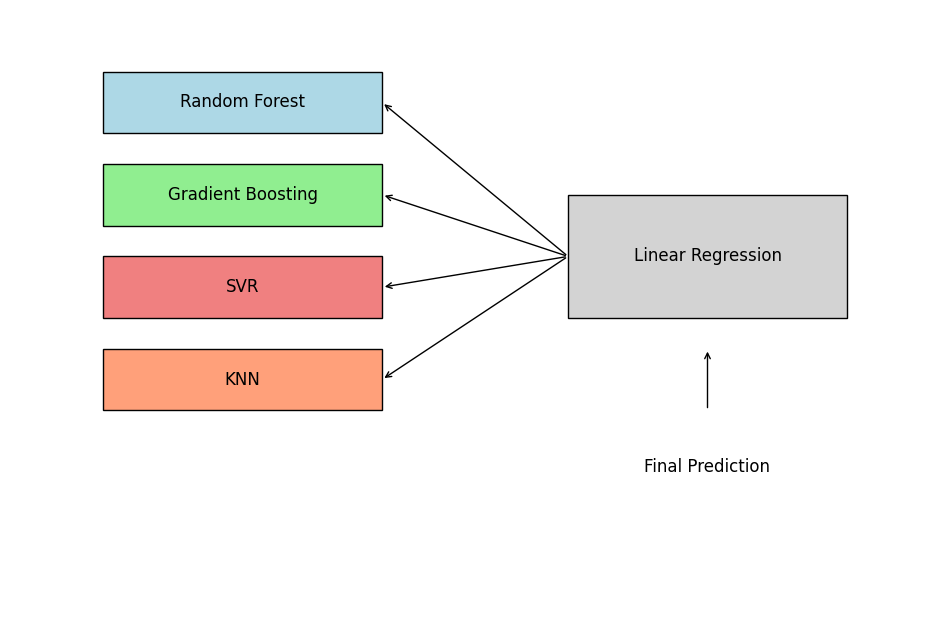

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Base models for regression
base_models = ['Random Forest', 'Gradient Boosting', 'SVR', 'KNN']
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon']

# Draw the base models
for i, (model, color) in enumerate(zip(base_models, colors)):
    ax.add_patch(patches.Rectangle((0.1, 0.8-i*0.15), 0.3, 0.1, fill=True, edgecolor='black', facecolor=color))
    ax.text(0.25, 0.85-i*0.15, model, fontsize=12, ha='center', va='center')

# Meta-model
ax.add_patch(patches.Rectangle((0.6, 0.5), 0.3, 0.2, fill=True, edgecolor='black', facecolor='lightgray'))
ax.text(0.75, 0.6, 'Linear Regression', fontsize=12, ha='center', va='center')

# Arrows from base models to meta-model
for i in range(len(base_models)):
    ax.annotate('', xy=(0.4, 0.85-i*0.15), xytext=(0.6, 0.6),
                arrowprops=dict(facecolor='black', arrowstyle='->'))

# Arrow from meta-model to output
ax.annotate('', xy=(0.75, 0.45), xytext=(0.75, 0.35),
            arrowprops=dict(facecolor='black', arrowstyle='->'))
ax.text(0.75, 0.25, 'Final Prediction', fontsize=12, ha='center')

# Set limits and remove axes
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')

# Show the diagram
plt.show()


# Gradient Boosting Machine (GBM)

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

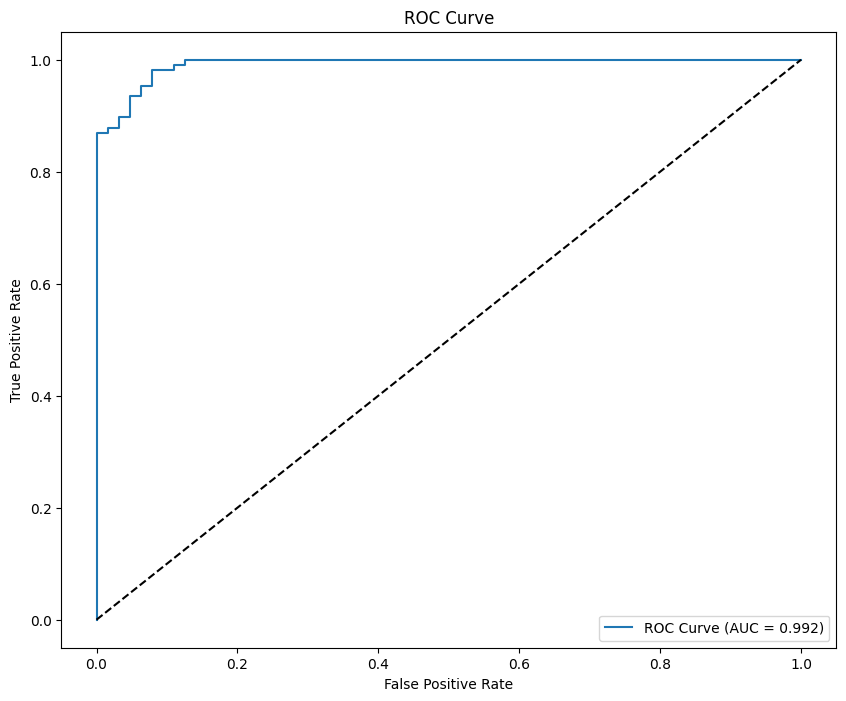

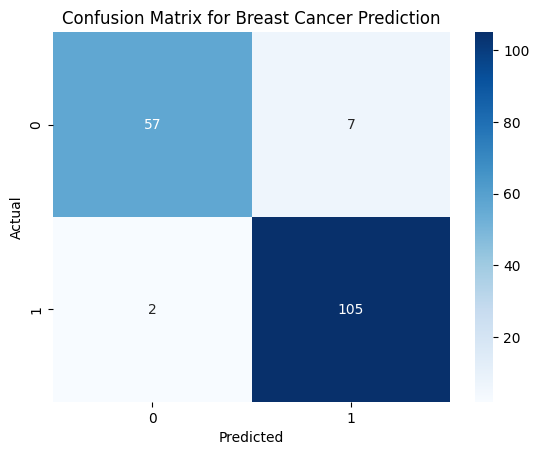

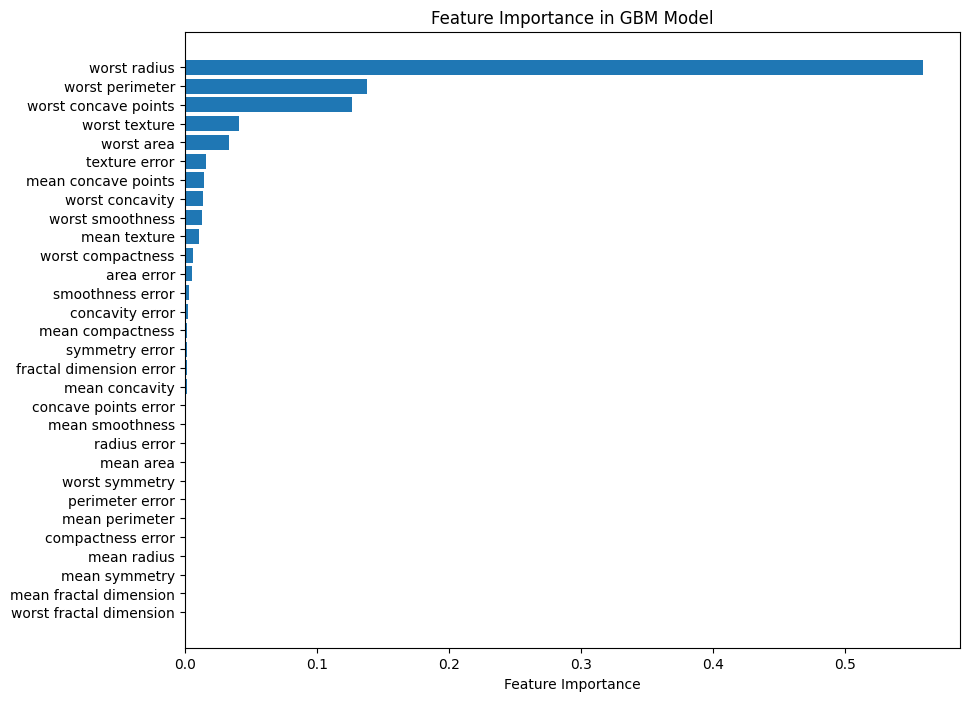

In [11]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Breast Cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display basic statistics and class distribution
print(df.describe())
print(df['target'].value_counts())

# Prepare features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Initialize and train the Gradient Boosting model with hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

gbm = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print(f"Best Parameters: {grid_search.best_params_}")

# Make predictions on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Visualize the confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Breast Cancer Prediction')
plt.show()

# Feature importance
feature_importances = grid_search.best_estimator_.feature_importances_
sorted_idx = feature_importances.argsort()
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X.columns[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in GBM Model")
plt.show()


# Cross Validation

In [12]:
# test classification dataset
from sklearn.datasets import make_classification
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# define dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)

# evaluate a logistic regression model using k-fold cross-validation
# create dataset
X, y = make_classification(n_samples=100, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.850 (0.128)


# Hyperparameter tuning

## GridSearch

In [13]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Create a model
model = RandomForestClassifier(random_state=42)

# Step 3: Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Step 4: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'max_depth': None, 'n_estimators': 50}
Best Score: 0.9
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       145
           1       0.89      0.81      0.85       155

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



## Random Search

In [14]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Step 1: Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Create a model
model = RandomForestClassifier(random_state=42)

# Step 3: Set up the hyperparameter distribution
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                    n_iter=10, cv=5, scoring='accuracy', 
                                    verbose=1, random_state=42)

# Step 4: Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 40}
Best Score: 0.9
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       145
           1       0.89      0.83      0.86       155

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

